# Exploratory Data Analisis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
%matplotlib inline


The file passengers.csv contains the data of 892 passengers onboard the Titanic when it sank that fateful day. We can load that information into a dataframe which we'll call passengers.

In [2]:
passengers = pd.read_csv('passengers.csv')
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
passengers.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
passengers.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see, there are missing values for the age, cabin and embarked.
We will try to manipulate those missing values, so we can work with them

## Let's take a closer look into the Survivors

In [6]:
passengers.Survived.value_counts()


0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survivied')

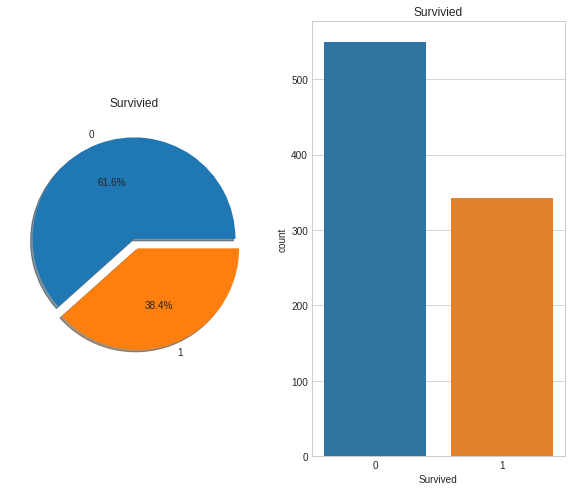

In [7]:
f, ax = plt.subplots(1, 2, figsize=(10, 8))
passengers.Survived.value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', explode=[0, 0.1], shadow=True)
sns.countplot(data=passengers, x='Survived', ax=ax[1])
ax[0].set_title('Survivied')
ax[0].set_ylabel('')
ax[1].set_title('Survivied')


We can see that of 891 passengers only 342 survived, or around 38%.
We would like to see if there is any relationship between survival and any of the other features, i.e. Sex, PClass, Age, etc.

## Survival in relationship to Sex

Let's explore how the surviors group according to their gender

In [8]:
passengers.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
passengers.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [10]:
survivors = passengers[passengers.Survived == 1]
survivors.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
survivors.groupby('Sex').Survived.count()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [12]:
survivors.Sex.value_counts(normalize=True)

female    0.681287
male      0.318713
Name: Sex, dtype: float64

Text(0.5, 1.0, 'Survival and Death count by Gender')

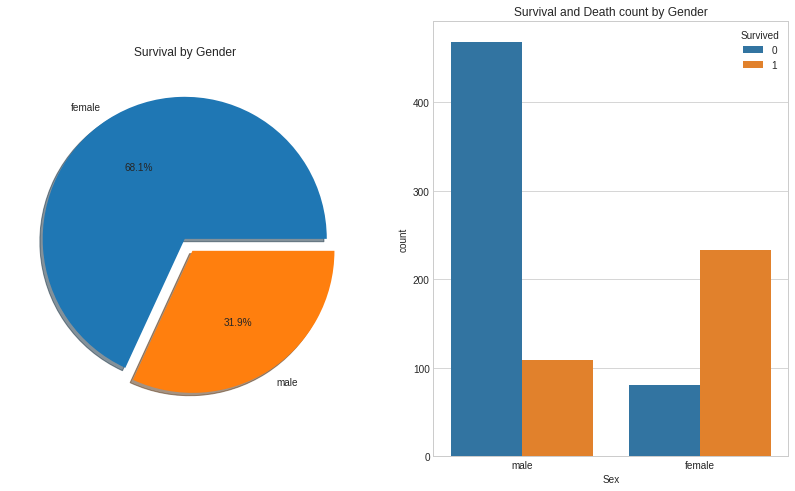

In [13]:
f, ax =plt.subplots(1,2, figsize=(14,8))
survivors.Sex.value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', shadow=True, explode=[0,0.1])
ax[0].set_title('Survival by Gender')
ax[0].set_ylabel('')
sns.countplot(data=passengers, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('Survival and Death count by Gender')

We can observe that even though the majority of the passengers were male (65%), more women survivived.
Around 74% (233) of women survived, while the survival rate for men is only 19% (109).

We can see that there is a strong relationship between the survival rate and the gender.

## Pclass and Survival

Is there a different survival rate according to the Class?

In [14]:
pd.crosstab(passengers.Survived, passengers.Pclass, margins=True)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [15]:
pd.crosstab([passengers.Survived, passengers.Sex], passengers.Pclass, margins=True)

Pclass             1    2    3  All
Survived Sex                       
0        female    3    6   72   81
         male     77   91  300  468
1        female   91   70   72  233
         male     45   17   47  109
All              216  184  491  891

Text(0.5, 1.0, 'Survival by Class')

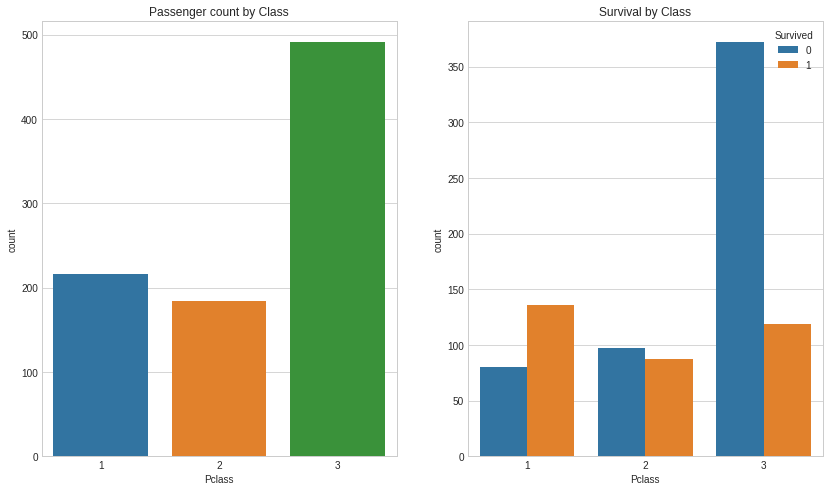

In [16]:
f, ax = plt.subplots(1, 2, figsize=(14, 8))
sns.countplot(data=passengers, x='Pclass', ax=ax[0])
ax[0].set_title('Passenger count by Class')
sns.countplot(data=passengers, x='Pclass', hue='Survived')
ax[1].set_title('Survival by Class')

In [17]:

survivors.groupby(['Pclass', 'Sex']).Survived.count()

Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64

In [18]:
perc_first = len(survivors[survivors.Pclass == 1])*100/len(passengers[passengers.Pclass == 1])
perc_second =len(survivors[survivors.Pclass == 2])*100/len(passengers[passengers.Pclass == 2])
perc_third =len(survivors[survivors.Pclass == 3])*100/len(passengers[passengers.Pclass == 3])
print(f'The percentage of survivors in the 1st class is {perc_first}')
print(f'The percentage of survivors in the 2nd class is {perc_second}')
print(f'The percentage of survivors in the 3rd class is {perc_third}')

The percentage of survivors in the 1st class is 62.96296296296296
The percentage of survivors in the 2nd class is 47.28260869565217
The percentage of survivors in the 3rd class is 24.236252545824847


Text(0.5, 1.0, 'Survival Percentage by Class and Gender')

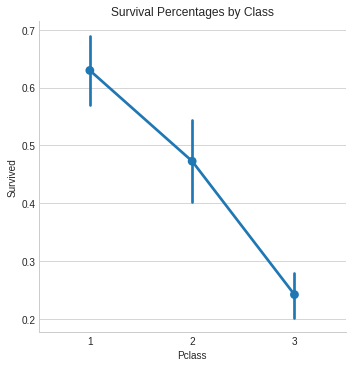

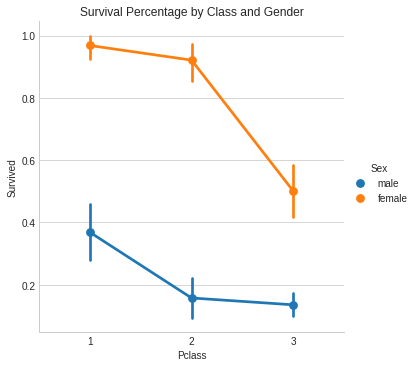

In [19]:
sns.catplot(data=passengers, x='Pclass', y='Survived', kind='point')
plt.title('Survival Percentages by Class')
sns.catplot(data=passengers, x='Pclass', y='Survived', kind='point', hue='Sex')
plt.title('Survival Percentage by Class and Gender')

Once again, we can see a relevant relationship between the class and survival rate.
1st class has the highest percentage of survivors and that percentage declines as we move to the other classes.

We can also see that the survival percentage is even higher when we consider the gender female as well. In fact the surviaval rate of women in first class was close to 100%; from 94 women in that class, 91 survived. 

Even women in the 3rd class have a higher survival rate than men in 1st class.

# What about the Age?

Let's see if the age tells us anything in regards to the survival probability.


In [20]:
print(f'The oldest person was {passengers.Age.max()}')
print(f'The youngest person was {passengers.Age.min()}')
print(f'The mean age was {round(passengers.Age.mean(), 1)}')

The oldest person was 80.0
The youngest person was 0.42
The mean age was 29.7


In [21]:
passengers.Age.isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

There are 177 missing values for the age. We can handle this issue in two ways:
    
    1) We drop all those values or;
    
    2) We fill those missing values with some other value, f.e. the mean age
    
For now, i will not consider the passengers who have null values for Age, but when training the model for a logistic regression, I will use data where those missing values where filled with the mean age

In [22]:
passengers.fillna(value={'Age': passengers.Age.mean()}, inplace=True)

In [23]:
passengers.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
#We are going to create another dataframe with the original data, where the
#missing values in Age haven't been filled
df = pd.read_csv('passengers.csv')
df.Age.isnull().sum()

177

In [25]:
df.groupby(['Sex', 'Survived']).Age.mean()

Sex     Survived
female  0           25.046875
        1           28.847716
male    0           31.618056
        1           27.276022
Name: Age, dtype: float64

Text(0.5, 1.0, 'Survival Count by Age and Gender')

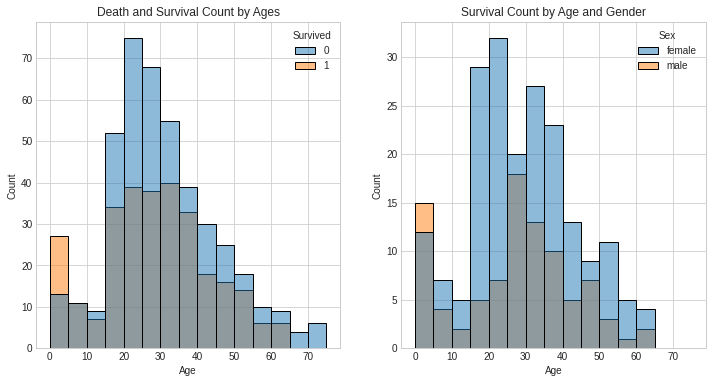

In [26]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Survived', bins=np.arange(0,80, 5), ax=ax[0])
ax[0].set_title('Death and Survival Count by Ages')
sns.histplot(data=df[df.Survived == 1], x='Age', hue='Sex', bins=np.arange(0,80, 5), ax=ax[1])
ax[1].set_title('Survival Count by Age and Gender')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

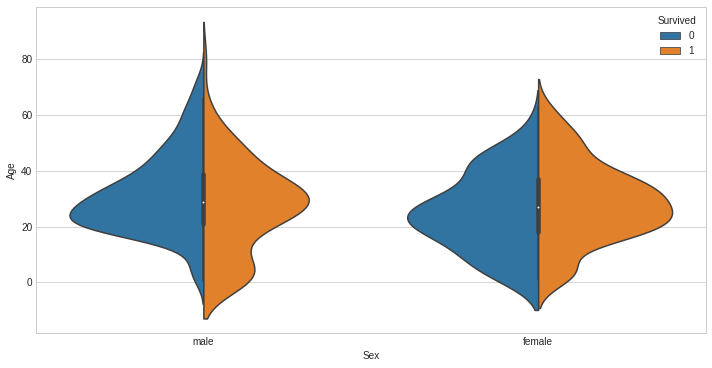

In [27]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Sex', y='Age', hue='Survived', split=True)

We can note that the survival rates for ages < 15 were quite high.

Ages between 15 and 35 present the highest mortality rates.

# Feature Selection and Data Preparation

In [28]:
corr_matrix = passengers.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<AxesSubplot:>

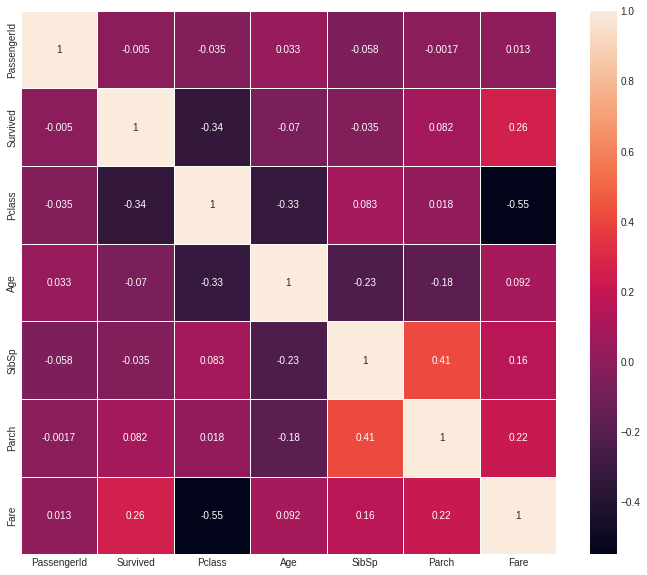

In [29]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2g', linewidths=1, linecolor='white')

We have alredy detected 3 Features that are quite relevant in regards to the survival probability: Sex, Class and Age.
    

If we check the correlation matrix () we can observe that no other feature asaide 'Pclass' has a relevant correlation with the variable 'Surived', therefore we can comfortably use the features we've alredy selected.

Now we need to fill the missing values if there are any (which we alredy did for the Age) and also clean and process the data so that it can be properly learned by the ML Algorithm we select.

In [30]:
passengers.Sex = passengers.Sex.map({'male': 0, 'female': 1})
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


We changed the Sex column so that it has 0 or 1 depending if the person is male or female, respectively.

Now, we can hot one encode the PClass, creating 3 new variables First, Second and Third where a 1,  represents that said passenger was traveling in that Class.

In [31]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
enc_data = pd.DataFrame(ohe.fit_transform(passengers[['Pclass']]).toarray())
passengers[['First', 'Second', 'Third']] = enc_data

In [32]:
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First,Second,Third
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0


Now that we have our clean and encoded data, we can select the relevant features and labels and train a logistic regression algorithm

In [33]:
features = passengers[['Sex', 'Age', 'First', 'Second', 'Third']]
features.head()

,Sex,Age,First,Second,Third
0,0,22.0,0.0,0.0,1.0
1,1,38.0,1.0,0.0,0.0
2,1,26.0,0.0,0.0,1.0
3,1,35.0,1.0,0.0,0.0
4,0,35.0,0.0,0.0,1.0


In [34]:
survival = passengers['Survived']
survival

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Training a Logistic Regression Model

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [46]:
X_train, X_test, y_train, y_test = train_test_split(features, survival, test_size = 0.2, random_state=42)

Now that we have our train and test data we can train the model

In [63]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

In [64]:
logistic.score(X_test, y_test)

0.8100558659217877

In [72]:
prediction = logistic.predict(X_test)
(prediction)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1])

In [79]:
accuracy = accuracy_score(y_test, prediction)
print(f'Accuracy of the Logistic Regresssion Model: {accuracy}')

Accuracy of the Logistic Regresssion Model: 0.8100558659217877
